# Fashion MNIST

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

This neural network has one input layer, two hidden layers, and one output layer with 10 neurons (10 possible classes)

In [2]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512, activation = tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0]) #plot the image matrix
#print(train_labels[0])
#print(train_images[0])
train_images  = train_images / 255.0
test_images = test_images / 255.0

In [10]:
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.3681 - acc: 0.8700
Epoch 2/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.3550 - acc: 0.8725
Epoch 3/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.3426 - acc: 0.8784
Epoch 4/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.3323 - acc: 0.8821
Epoch 5/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.3222 - acc: 0.8842


In [5]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 68us/step


[0.405930677819252, 0.8529]

[3.4031640e-05 1.0506518e-05 8.3932355e-05 8.3925712e-05 2.7185979e-05
 9.0393879e-02 1.6727175e-04 1.3038118e-01 9.5356898e-03 7.6928246e-01]
[9 2 1 ... 8 1 5]


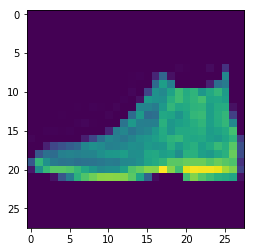

In [7]:
classifications = model.predict(test_images)

plt.imshow(test_images[0]) #plot the image matrix

print(classifications[0])

print (np.argmax(classifications, axis = 1))

This is the code for callback- ending the training before the number of specified epochs once convergence is reached.

In [57]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

1.12.0
Epoch 1/5
60000/60000 [==============================] - 17s 288us/step - loss: 0.4720
Epoch 2/5
59808/60000 [============================>.] - ETA: 0s - loss: 0.3594
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 16s 259us/step - loss: 0.3592


# Digit MNIST

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

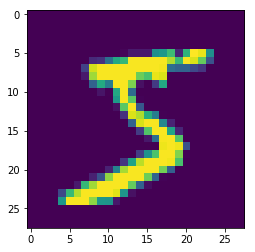

In [66]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[0]) #plot the image matrix
print(y_train[0])
print(x_train[0])
x_train = x_train/255
x_test = x_test/255


model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512, activation = tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])


In [67]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=8)

Epoch 1/8
60000/60000 [==============================] - 29s 484us/step - loss: 0.1842 - acc: 0.9441
Epoch 2/8
60000/60000 [==============================] - 27s 457us/step - loss: 0.0801 - acc: 0.9756
Epoch 3/8
60000/60000 [==============================] - 40s 665us/step - loss: 0.0560 - acc: 0.9819
Epoch 4/8
60000/60000 [==============================] - 42s 694us/step - loss: 0.0420 - acc: 0.9869
Epoch 5/8
60000/60000 [==============================] - 29s 491us/step - loss: 0.0350 - acc: 0.9884
Epoch 6/8
60000/60000 [==============================] - 28s 461us/step - loss: 0.0285 - acc: 0.9908
Epoch 7/8
60000/60000 [==============================] - 23s 381us/step - loss: 0.0246 - acc: 0.99201s - loss:
Epoch 8/8
60000/60000 [==============================] - 19s 310us/step - loss: 0.0245 - acc: 0.9925


10000/10000 [==============================] - 1s 86us/step
[3.8628494e-17 2.3186971e-11 6.5148620e-12 4.6751412e-11 1.0875046e-14
 3.5863209e-14 5.5464998e-19 1.0000000e+00 2.4628766e-13 2.1654692e-10]


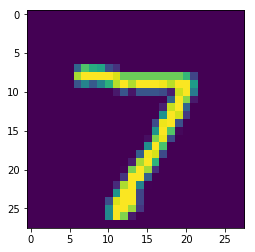

In [70]:
model.evaluate(x_test, y_test)

classifications = model.predict(x_test)

plt.imshow(x_test[0]) #plot the image matrix

print(classifications[0])

# Fashion MNIST CNN

In [25]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.998):
            print("\nReached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

print (training_images.shape)
model = keras.models.Sequential([    
    keras.layers.Conv2D(64,(4,4), activation = 'relu', input_shape = (28,28,1)),  #Conv2D expects input with 4 dimensions so add extra 1
    keras.layers.MaxPooling2D((2,2), strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

training_images = training_images.reshape(60000, 28, 28, 1) #reshape input training data to 4 dimensions 

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

1.12.0
(60000, 28, 28)
Epoch 1/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.3765 - acc: 0.8628
Epoch 2/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.2547 - acc: 0.9064
Epoch 3/10
60000/60000 [==============================] - 150s 2ms/step - loss: 0.2035 - acc: 0.9227
Epoch 4/10
60000/60000 [==============================] - 169s 3ms/step - loss: 0.1674 - acc: 0.9362
Epoch 5/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.1361 - acc: 0.9488
Epoch 6/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1139 - acc: 0.9564
Epoch 7/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0949 - acc: 0.9649
Epoch 8/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0812 - acc: 0.9698 0s - loss: 0.0812 - acc:
Epoch 9/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0658 - acc: 0.9750
Epoch 10/10
60000/60000 [==================

In [26]:
test_images = test_images.reshape(10000, 28, 28, 1) #test data also reshaped to 4 dimensions since Conv2D used in model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 9s 904us/step


[0.42551467752978206, 0.9095]